In [1]:
!pip install yfinance


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [2]:
# import TSLA stock data from 1 AUG 2025 - 30 NOV 2025 from yfinance

start_date = "2025-08-01"
end_date = "2025-11-30"
ticker = "TSLA"

tsla = yf.download(ticker, start_date, end_date, auto_adjust = False)
tsla.tail(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2025-11-21,391.089996,391.089996,402.799988,383.760010,402.320007,100460600
2025-11-24,417.779999,417.779999,421.720001,401.089996,402.170013,96806400
2025-11-25,419.399994,419.399994,420.480011,405.950012,414.420013,71915600
2025-11-26,426.579987,426.579987,426.940002,416.890015,423.950012,63463000
2025-11-28,430.170013,430.170013,432.929993,426.200012,426.589996,36252900


## Compute rolling historical volatility (7-day & 3-day) using close-to-close log returns

Log-returns, also known as logarithmic returns, are calculated using the natural logarithm of the ratio of the current price to the previous price.

In [3]:
# calculate daily log returns
tsla["Log_Returns"] = np.log(tsla["Adj Close"] / tsla["Adj Close"].shift(1)) 
tsla.head()

Price,Adj Close,Close,High,Low,Open,Volume,Log_Returns
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,,
2025-08-01,302.630005,302.630005,309.309998,297.820007,306.209991,89121400,NaN
2025-08-04,309.260010,309.260010,312.119995,303.000000,309.079987,78683900,0.021671
2025-08-05,308.720001,308.720001,312.450012,305.500000,308.950012,57961300,-0.001748
2025-08-06,319.910004,319.910004,320.470001,306.929993,307.890015,78523600,0.035605
2025-08-07,322.269989,322.269989,322.399994,316.160004,319.790009,66658700,0.007350


Note:  

Realized volatility is almost always computed using log returns, not simple percentage changes. 

For small returns, pct_change() roughly equates to log returns, but the difference increases with volatility or over longer intervals.  

tsla["Adj Close"].shift(1) provides yesterday's Adj Close, allowing the ratio (today's Adj Close / yesterday's Adj Close) to be computed for daily log returns. 


In [4]:
# define rolling window 

rolling_window1= 7

rolling_window2 = 3

In [5]:
# calculate 7d rolling volatility
tsla["Rolling_Vol_7d"] = tsla["Log_Returns"].rolling(window = rolling_window1).std()

# calculate 3d rolling volatility
tsla["Rolling_Vol_3d"] = tsla["Log_Returns"].rolling(window = rolling_window2).std()

tsla.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Log_Returns,Rolling_Vol_7d,Rolling_Vol_3d
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,
Date,,,,,,,,,
2025-08-01,302.630005,302.630005,309.309998,297.820007,306.209991,89121400,NaN,NaN,NaN
2025-08-04,309.260010,309.260010,312.119995,303.000000,309.079987,78683900,0.021671,NaN,NaN
2025-08-05,308.720001,308.720001,312.450012,305.500000,308.950012,57961300,-0.001748,NaN,NaN
2025-08-06,319.910004,319.910004,320.470001,306.929993,307.890015,78523600,0.035605,NaN,0.018876
2025-08-07,322.269989,322.269989,322.399994,316.160004,319.790009,66658700,0.007350,NaN,0.019478
2025-08-08,329.649994,329.649994,335.149994,320.980011,321.429993,91200300,0.022642,NaN,0.014144
2025-08-11,339.029999,339.029999,346.640015,334.149994,335.000000,105320200,0.028057,NaN,0.010739
2025-08-12,340.839996,340.839996,345.260010,332.940002,345.000000,80522100,0.005325,0.013558,0.011874


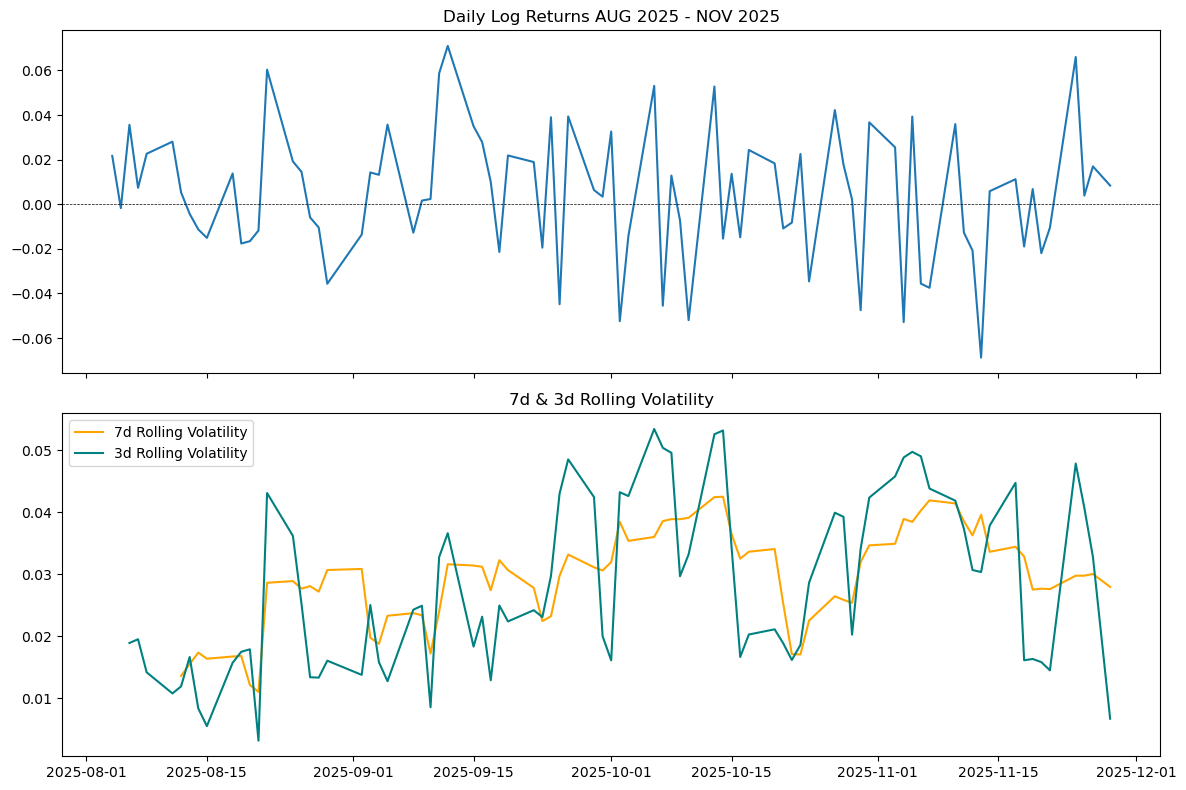

In [6]:
fig, ax = plt.subplots(2, 1, figsize = (12, 8), sharex = True)

# subplot 1: Daily log returns
ax[0].plot(tsla.index, tsla["Log_Returns"], label = "Daily Log Returns")
ax[0].set_title("Daily Log Returns AUG 2025 - NOV 2025")
ax[0].axhline(0, color = "black", linewidth = 0.5, linestyle = "--")

# subplot 2: 7d & 3d rolling volatility
ax[1].plot(tsla.index, tsla["Rolling_Vol_7d"], color = "orange", label = "7d Rolling Volatility")
ax[1].plot(tsla.index, tsla["Rolling_Vol_3d"], color = "teal", label = "3d Rolling Volatility")
ax[1].legend()
ax[1].set_title("7d & 3d Rolling Volatility")

plt.tight_layout()
plt.show()

## Compute ATR (Based on 14-day SMA of TR)

The ATR measures market volatility by calculating the moving average of the true range (TR) over a defined period, usually 14 days. 

The ATR calculation can be broken down into 2 steps.

Step 1. Calculate the TR for each period

Step 2. Calculate the ATR: Moving average of TR over a defined period, usually 14 days

The TR for 1 period is the greatest of the following three values:

A) current high - current low

B) The absolute value of the (current high - previous close)

C) The absolute value of the (current low - previous close)

A) 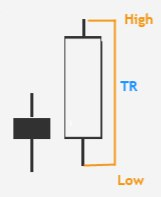
B) 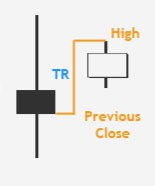
C) 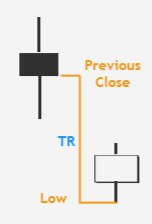

In [7]:
# True Range Components

# current high - current low
tsla["H_L"] = tsla["High"] - tsla["Low"]

# absolute value of the (current high - previous close)
tsla["H_PC"] = (tsla["High"] - tsla["Adj Close"].shift(1)).abs()

# absolute value of the (current low - previous close)
tsla["L_PC"] = (tsla["Low"] - tsla["Adj Close"].shift(1)).abs()

In [8]:
# True Range
tsla["TR"] = tsla[["H_L", "H_PC", "L_PC"]].max(axis = 1)  

In [9]:
# ATR is the moving average of the true range over a defined period, usually 14 days

# ATR (calculated using SMA)
tsla["ATR_14"] = tsla["TR"].rolling(window = 14).mean()

In [10]:
tsla.head(20)

Price,Adj Close,Close,High,Low,Open,Volume,Log_Returns,Rolling_Vol_7d,Rolling_Vol_3d,H_L,H_PC,L_PC,TR,ATR_14
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,,,,,,,,
Date,,,,,,,,,,,,,,
2025-08-01,302.630005,302.630005,309.309998,297.820007,306.209991,89121400,NaN,NaN,NaN,11.489990,NaN,NaN,11.489990,NaN
2025-08-04,309.260010,309.260010,312.119995,303.000000,309.079987,78683900,0.021671,NaN,NaN,9.119995,9.489990,0.369995,9.489990,NaN
2025-08-05,308.720001,308.720001,312.450012,305.500000,308.950012,57961300,-0.001748,NaN,NaN,6.950012,3.190002,3.760010,6.950012,NaN
2025-08-06,319.910004,319.910004,320.470001,306.929993,307.890015,78523600,0.035605,NaN,0.018876,13.540009,11.750000,1.790009,13.540009,NaN
2025-08-07,322.269989,322.269989,322.399994,316.160004,319.790009,66658700,0.007350,NaN,0.019478,6.239990,2.489990,3.750000,6.239990,NaN
2025-08-08,329.649994,329.649994,335.149994,320.980011,321.429993,91200300,0.022642,NaN,0.014144,14.169983,12.880005,1.289978,14.169983,NaN
2025-08-11,339.029999,339.029999,346.640015,334.149994,335.000000,105320200,0.028057,NaN,0.010739,12.490021,16.990021,4.500000,16.990021,NaN
2025-08-12,340.839996,340.839996,345.260010,332.940002,345.000000,80522100,0.005325,0.013558,0.011874,12.320007,6.230011,6.089996,12.320007,NaN


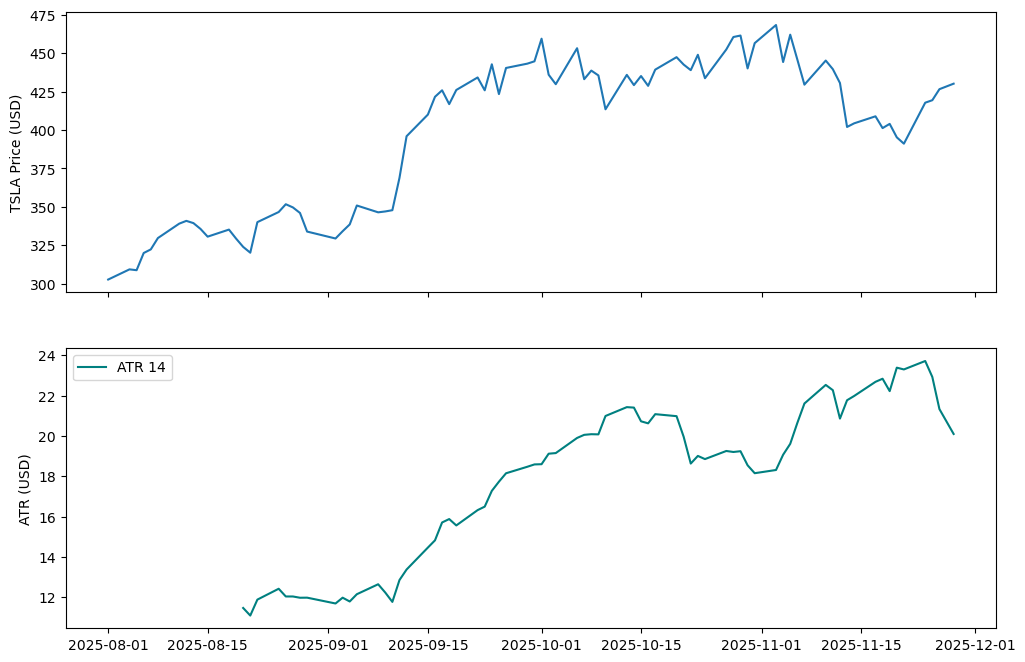

In [11]:
fig, (ax_Price, ax_ATR) = plt.subplots(2,1, figsize = (12, 8), sharex = True)

ax_Price.plot(tsla["Adj Close"], label = "Price")
ax_Price.set_ylabel("TSLA Price (USD)")

ax_ATR.plot(tsla["ATR_14"], label = "ATR 14", color = "teal")
ax_ATR.set_ylabel("ATR (USD)")

plt.legend()
plt.show()

ATR is measured in the same units as the price. 

E.g. ATR: 11 

If ATR is 11, this means that over the past 14 periods (usually days), the average true range of daily price movement was $11. 

Higher ATR ---> Greater volatility

Lower ATR ---> Lower volatility, i.e. calmer price action

The fact that ATR is calculated using absolute values of differences in price is something that should not be ignored. This is relevant because it means that securities with higher price values will inherently have higher ATR values. Likewise, securities with lower price values will have lower ATR values. The consequence is that a trader cannot compare the ATR values of multiple securities. What is considered to be a high ATR value or a high ATR range for one security may not be the same for another security. A trader should study and research the relevance of ATR for each security independently when performing chart analysis. 

Some practical uses of ATR:

1. Position sizing
- Some traders size positions based on ATR so that their risk in dollars stays consistent, e.g., wider ATR ---> smaller position


2. Stop-loss placement
- ATR can help set stops: e.g., "2 x ATR below entry"


3. Trend strength / volatility
- Rising ATR ---> increasing volatility, often at the start of a trend or breakout
- Falling ATR ---> decreasing volatility, which could suggest that the market is consolidating or that a trend is losing steam 
